In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import math
from pathlib import Path
import os
import datetime

from astropy.timeseries import LombScargle

In [10]:
#read in light curves as a file list
read_path = Path('./RZ Cep/All_RZ_Cep/Light Curve CSVs/')
file_list = [f for f in os.listdir(read_path)if f.endswith('_1.csv')]

In [11]:
#convert datetimes into julian times
#function from stackexchange, user SmittySmee
def get_julian_datetime(date):
    """
    Convert a datetime object into julian float.
    Args:
        date: datetime-object of date in question

    Returns: float - Julian calculated datetime.
    Raises: 
        TypeError : Incorrect parameter type
        ValueError: Date out of range of equation
    """

    # Ensure correct format
    if not isinstance(date, datetime.datetime):
        raise TypeError('Invalid type for parameter "date" - expecting datetime')
    elif date.year < 1801 or date.year > 2099:
        raise ValueError('Datetime must be between year 1801 and 2099')

    # Perform the calculation
    julian_datetime = 367 * date.year - int((7 * (date.year + int((date.month + 9) / 12.0))) / 4.0) + int(
        (275 * date.month) / 9.0) + date.day + 1721013.5 + (
                          date.hour + date.minute / 60.0 + date.second / math.pow(60,
                                                                                  2)) / 24.0 - 0.5 * math.copysign(
        1, 100 * date.year + date.month - 190002.5) + 0.5

    return julian_datetime

def fold_lightcurve(time, flux, error, period):
    """
    Folds the lightcurve given a period.
    time: input time (same unit as period)
    flux: input flux
    error: input error
    period: period to be folded to, needs to same unit as time (i.e. days)
    returns: phase, folded flux, folded error
    """
    #Create a pandats dataframe from the data
    data = pd.DataFrame({'time': time, 'flux': flux, 'error': error})
    
    #create the phase 
    data['phase'] = data.apply(lambda x: ((x.time/ period) - np.floor(x.time / period)), axis=1)
    
    #Creates the out phase, flux and error
    phase_long = np.concatenate((data['phase'], data['phase'] + 1.0, data['phase'] + 2.0))
    flux_long = np.concatenate((flux, flux, flux))
    err_long = np.concatenate((error, error, error))
    
    return(phase_long, flux_long, err_long)

def apply_julian_time_to_dataframe(file_name):
    """
    Applies 'get_julian_datetime' to a dataframe by reading it in
    file_name: name of the file to be read in as a dataframe
    dataframe: the name the dataframe will be stored under
    """
    #read in dataframe and drop any rows containing 'NaN' values
    dataframe = pd.read_csv(read_path / file_name)
    dataframe = dataframe.dropna(axis=1, how='all')
    dataframe = dataframe.dropna(axis=0, how='any')
    
    #set up empty intermediate array for julian times
    julian_times = []
    
    #convert to datetime
    for time in pd.to_datetime(dataframe['date_time']):
        #convert to julian time
        julian_times.append(get_julian_datetime(time))
    #add julian times to dataframe
    dataframe['julian_time'] = julian_times
    
    return dataframe

In [12]:
period_2017 = 0.30868 #find date of last!!!!

dec_2022 = apply_julian_time_to_dataframe(file_list[0])
jan_2023 = apply_julian_time_to_dataframe(file_list[1])
feb_2023 = apply_julian_time_to_dataframe(file_list[2])
nov_2023 = apply_julian_time_to_dataframe(file_list[3])

phase_dec, mag_dec, error_dec = fold_lightcurve(dec_2022['julian_time'], dec_2022['corrected_magnitude'], 
                                                dec_2022['magnitude_error'], period_2017)
phase_jan, mag_jan, error_jan = fold_lightcurve(jan_2023['julian_time'], jan_2023['corrected_magnitude'], 
                                                jan_2023['magnitude_error'], period_2017)
phase_feb, mag_feb, error_feb = fold_lightcurve(feb_2023['julian_time'], feb_2023['corrected_magnitude'], 
                                                feb_2023['magnitude_error'], period_2017)
phase_nov, mag_nov, error_nov = fold_lightcurve(nov_2023['julian_time'], nov_2023['corrected_magnitude'], 
                                                nov_2023['magnitude_error'], period_2017)
dec_2022

,Unnamed: 0,corrected_magnitude,magnitude_error,date_time,ap_counts,an_counts,sky_sub,radius,exp_time,julian_time
0,0,-13.643515,0.173613,2022-12-07 20:21:36.898,2.736384e+06,1.021149e+06,1.715234e+06,31.134280,5.0,2.459921e+06
1,1,-13.549692,0.129711,2022-12-07 20:23:10.168,2.727697e+06,1.018942e+06,1.708755e+06,31.192647,5.0,2.459921e+06
2,2,-13.568838,0.145948,2022-12-07 20:26:47.376,2.706351e+06,9.934577e+05,1.712893e+06,31.273988,5.0,2.459921e+06
3,3,-13.545899,0.149291,2022-12-07 20:28:17.576,2.715494e+06,1.064900e+06,1.650594e+06,32.010741,5.0,2.459921e+06
4,4,-13.623884,0.152896,2022-12-07 20:31:55.369,2.582405e+06,9.383017e+05,1.644103e+06,30.589161,5.0,2.459921e+06
...,...,...,...,...,...,...,...,...,...,...
150,150,-13.417674,0.133388,2022-12-08 03:26:24.390,3.740397e+06,2.610342e+06,1.130055e+06,42.901207,5.0,2.459922e+06
151,151,-13.446866,0.123359,2022-12-08 03:27:56.264,3.729104e+06,2.645520e+06,1.083584e+06,42.892654,5.0,2.459922e+06
152,152,-13.476734,0.121890,2022-12-08 03:31:34.398,3.863527e+06,2.740148e+06,1.123380e+06,43.380537,5.0,2.459922e+06
153,153,-13.420691,0.152203,2022-12-08 03:33:04.554,3.705724e+06,2.589945e+06,1.115780e+06,42.229738,5.0,2.459922e+06


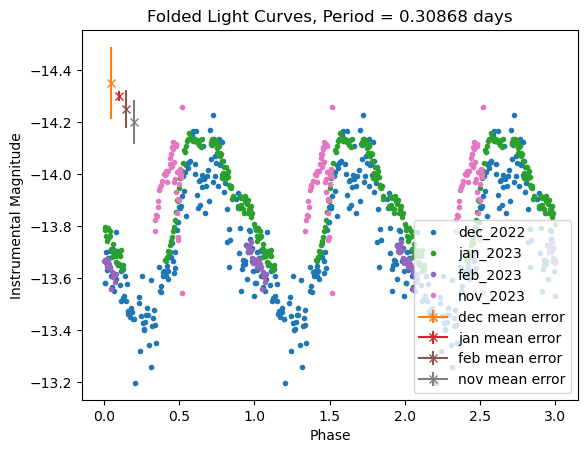

In [13]:
plt.plot(phase_dec, mag_dec, marker='.', ls='None', zorder=1, label='dec_2022')
plt.errorbar(0.05, -14.35, np.median(error_dec), marker='x', label='dec mean error')
plt.plot(phase_jan, mag_jan, marker='.', ls='None', zorder=2, label='jan_2023')
plt.errorbar(0.1, -14.3, np.median(error_jan), marker='x', label='jan mean error')
plt.plot(phase_feb, mag_feb, marker='.', ls='None', zorder=3, label='feb_2023')
plt.errorbar(0.15, -14.25, np.median(error_feb), marker='x', label='feb mean error')
plt.plot(phase_nov, mag_nov, marker='.', ls='None', zorder=4, label='nov_2023')
plt.errorbar(0.2, -14.2, np.median(error_nov), marker='x', label='nov mean error')
plt.gca().invert_yaxis()
plt.title(f'Folded Light Curves, Period = {period_2017} days')
plt.xlabel('Phase')
plt.ylabel('Instrumental Magnitude')
plt.legend()
plt.show()

In [14]:
df_combined = pd.concat([dec_2022, jan_2023], axis=0)
df_combined.reset_index()

combined_mags = np.asarray(df_combined['corrected_magnitude'])
combined_times = pd.to_datetime(df_combined['date_time'])
combined_julian_times = np.asarray(df_combined['julian_time'])
combined_error = df_combined['magnitude_error']

time_frequencies, time_powers = LombScargle(combined_julian_times, combined_mags).autopower()

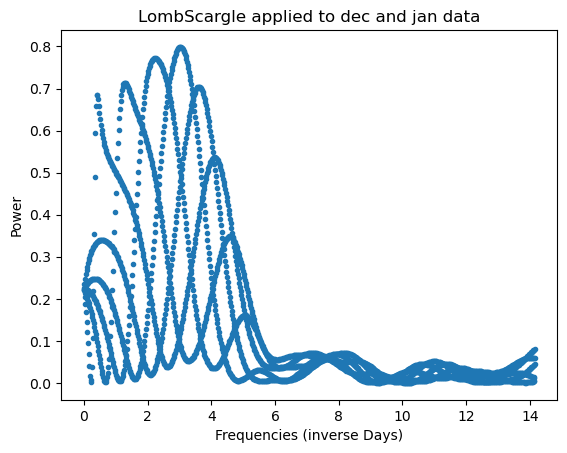

In [15]:
plt.plot(time_frequencies, time_powers, marker='.', ls='None')
plt.title('LombScargle applied to dec and jan data')
plt.xlabel('Frequencies (inverse Days)')
plt.ylabel('Power')
plt.show()

In [16]:
#find maximum value 
mask = np.logical_and(time_frequencies>0, time_frequencies<14)

max_frequency = time_frequencies[mask][np.argmax(time_powers[mask])]
print(max_frequency)

calculated_period = 1 / max_frequency
print(calculated_period)

3.026234790605948
0.3304436268805727


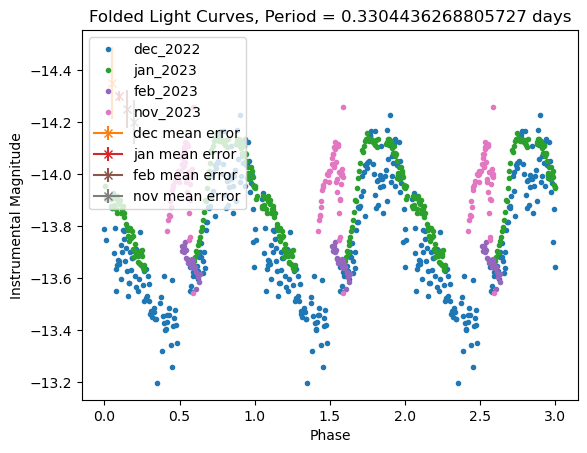

In [17]:
phase_dec_new, mag_dec_new, error_dec_new = fold_lightcurve(dec_2022['julian_time'], dec_2022['corrected_magnitude'], 
                                                dec_2022['magnitude_error'], calculated_period)
phase_jan_new, mag_jan_new, error_jan_new = fold_lightcurve(jan_2023['julian_time'], jan_2023['corrected_magnitude'], 
                                                jan_2023['magnitude_error'], calculated_period)
phase_feb_new, mag_feb_new, error_feb_new = fold_lightcurve(feb_2023['julian_time'], feb_2023['corrected_magnitude'], 
                                                feb_2023['magnitude_error'], calculated_period)
phase_nov_new, mag_nov_new, error_nov_new = fold_lightcurve(nov_2023['julian_time'], nov_2023['corrected_magnitude'], 
                                                nov_2023['magnitude_error'], calculated_period)

plt.plot(phase_dec_new, mag_dec_new, marker='.', ls='None', zorder=1, label='dec_2022')
plt.errorbar(0.05, -14.35, np.median(error_dec_new), marker='x', label='dec mean error')
plt.plot(phase_jan_new, mag_jan_new, marker='.', ls='None', zorder=2, label='jan_2023')
plt.errorbar(0.1, -14.3, np.median(error_jan_new), marker='x', label='jan mean error')
plt.plot(phase_feb_new, mag_feb_new, marker='.', ls='None', zorder=3, label='feb_2023')
plt.errorbar(0.15, -14.25, np.median(error_feb_new), marker='x', label='feb mean error')
plt.plot(phase_nov_new, mag_nov_new, marker='.', ls='None', zorder=4, label='nov_2023')
plt.errorbar(0.2, -14.2, np.median(error_nov_new), marker='x', label='nov mean error')
plt.gca().invert_yaxis()
plt.title(f'Folded Light Curves, Period = {calculated_period} days')
plt.xlabel('Phase')
plt.ylabel('Instrumental Magnitude')
plt.legend()
plt.show()

In [19]:
from astroquery.gaia import Gaia
import pandas as pd
import numpy as np
import pyvo as vo

def get_gaia_period(source_id, var_type='cep', period_col='p1_o'):
    if var_type=='cep':
        query = f"select source_id, {period_col} from gaiadr3.vari_cepheid where source_id in ({source_id})"
    elif var_type=='rrl':
        query = f"select source_id, {period_col} from gaiadr3.vari_rrlyrae where source_id in ({source_id})"
    job     = Gaia.launch_job_async(query)
    period = job.get_results()[period_col][0]
    return(period)

def read_gaia_epoch_photometry_from_query(source_id):
    """ read in the gaia epoch photometry files from datalink
    and convert to the right type of file for gloess
    """
    retrieval_type = 'EPOCH_PHOTOMETRY'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
    data_structure = 'INDIVIDUAL'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
    data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


    datalink = Gaia.load_data(ids=source_id, data_release = data_release, retrieval_type=retrieval_type, data_structure = data_structure, verbose = False, output_file = None)

    dl_key = 'EPOCH_PHOTOMETRY-Gaia DR3 ' + str(source_id) + '.xml'
    vot_df = datalink[dl_key][0].to_table().to_pandas()
    #vot_df = vot.parse_single_table(filename).to_table().to_pandas()
    if vot_df.source_id.nunique() > 1:
        print('more than one source_id in this file.')
        return(1)
    vot_df.dropna(subset='time', inplace=True)
    piv_df = vot_df[['band', 'time', 'mag', 'flux_over_error', 'source_id']].pivot(index="time", columns="band", values=["mag", 'flux_over_error', 'source_id'])
    """ check it's just a single object """
    
    filters = vot_df.band.unique()
    """ times are JD-2455197.5"""
    names = set_up_dataframe_cols(filters)
    names = np.append(names, 'source_id')
    df = pd.DataFrame(columns=names, index=vot_df.time.dropna().values)
    df['Gaia_JD'] = df.index.copy()
    df['MJD'] = get_gaia_jds(df, jd_col='Gaia_JD')
    for filt in filters:
        mag_col = 'mag_' + filt
        err_col = 'err_' + filt
        df[mag_col] = piv_df[('mag', filt)]
        df[err_col] = piv_df.apply(lambda x: get_gaia_errs(x[('flux_over_error', filt)], filt), axis=1)
    df['source_id'] = vot_df['source_id'][0]
    df.reset_index(inplace=True, drop=True)

    return(df)

gaia_period = get_gaia_period('V* RZ Cep', var_type='rrl', period_col='pf')
print(gaia_period)

500 Error 500:
null


HTTPError: Error 500:
null